# Imprecise period's effect on O-C Plot Illustration

Even the period used is signficantly different from the actual period, `0.001 d`, or `1.44 min`, O-C plot would look like a striaght line down (if period used is longer) or up (if the period used is shorter) for many cycles.

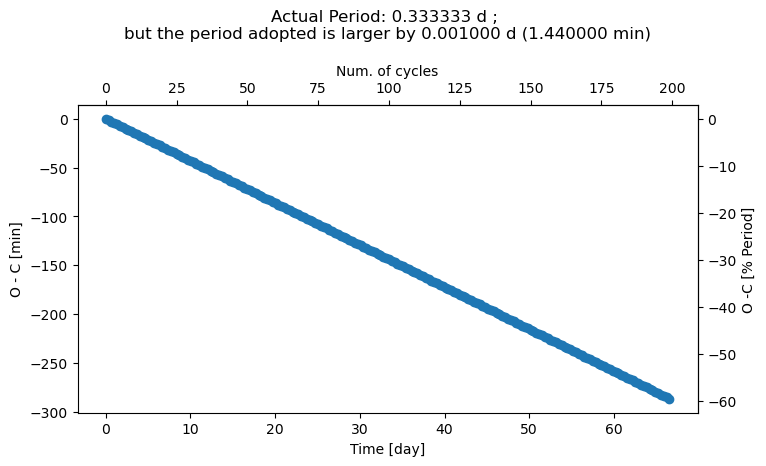

In [10]:
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

def plot_simulated_oc(period_actual, period_calc_diff, num_cycles, ax=None):
    period_calc_diff_min = period_calc_diff * 24 * 60
    period_calc = period_actual + period_calc_diff 
    
    cycles = np.array(range(0, num_cycles))
    epoch_obs = cycles * period_actual
    epoch_calc  = cycles * period_calc
    shift_days = (epoch_obs - epoch_calc)
    shift_mins = shift_days * 24 * 60
    
    if np.max(np.abs(shift_days)) > period_actual / 2:
        print(f"WARNING: soeme of simulated O-C is so large that it is more than half of the period")

    if ax is None:
        ax = plt.figure(figsize=(8, 4)).gca()

    ax.scatter(epoch_calc, shift_mins);
    ax.set_xlabel("Time [day]")
    ax.set_ylabel("O - C [min]")
    ax.set_title(f"Actual Period: {period_actual} d ; \nbut the period adopted is larger by {period_calc_diff:f} d ({period_calc_diff_min:.6f} min)\n")
    secax_x = ax.secondary_xaxis('top', functions=(
        lambda t: t / period_calc,
        lambda cycle: period_calc * cycle, 
        ));
    secax_x.set_xlabel("Num. of cycles");
    secax_y = ax.secondary_yaxis('right', functions=(
        lambda min: 100 * min / 24/ 60 / period_calc, 
        lambda period_pct: period_pct * period_calc * 24 * 60 / 100,
        ));
    secax_y.set_ylabel("O -C [% Period]");
    return ax


ax = plot_simulated_oc(
    period_actual=0.333333,
    period_calc_diff=0.001,
    num_cycles=200,
);


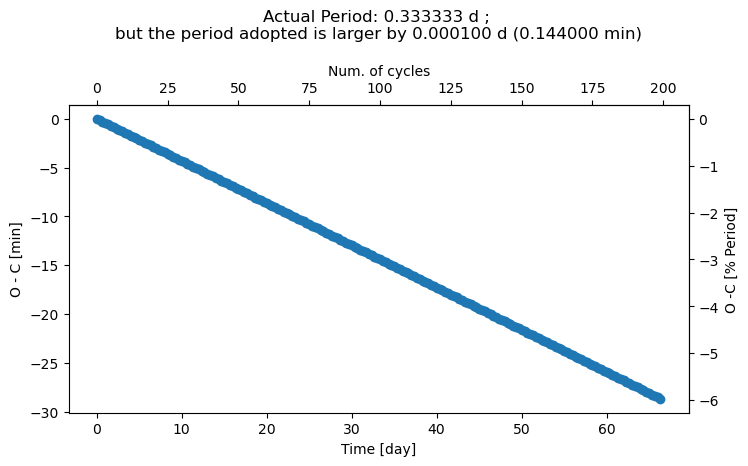

In [11]:
# case the period difference is smaller,  < 1 min 
ax = plot_simulated_oc(
    period_actual=0.333333,
    period_calc_diff=0.0001,
    num_cycles=200,
);